<a href="https://colab.research.google.com/github/ba88052/carrefoue/blob/main/%E5%AE%B6%E6%A8%82%E7%A6%8F%E5%AE%A2%E6%88%B6%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Start

In [1]:
#查看是否在colab環境
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

from google.colab import drive

#import常用套件與版本
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy
import sklearn
import gdown
import requests
#print("Numpy Version：", np.__version__)
#print("Pandas Version：",pd.__version__)
#print("Statsmodels Version：",sm.__version__)
#print("Seaborn Version：",seaborn.__version__)
#print("Matplotlib Version：",matplotlib.__version__)
#print("Scipy Version：",scipy.__version__)
#print("SKLearn Version：",sklearn.__version__)
#print("gdown Version：", gdown.__version__)
#print("requests Version：", requests.__version__)


# 掛載Google Drive（需更改路徑）
# if in_colab:
#   home_dir = ""
#   drive.mount("/content/drive")
#   groot_dir = "/content/drive/My Drive/DataAnalysis"

# import os
# file1 = os.path.join(groot_dir, "Testing.jpg")
# f = file1
# print(f)
# print(os.path.exists(f))

# data_dir = groot_dir + "/carrefour"

#將印出圖片時需要的設定函數化
def start_plot(figsize=(10, 8), style = 'whitegrid'):
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1,1)
    plt.tight_layout()
    with sns.axes_style(style):
        ax = fig.add_subplot(gs[0,0])
    return ax


#偵測環境
import platform
print("We're running on", platform.platform())
print("Python version", platform.python_version())
print(platform.uname())


#印出當前時間（確認時間沒問題）
from datetime import datetime
from dateutil.relativedelta import *
local_time = lambda x, offset: x + relativedelta(hours= offset)
#因為用虛擬機，內置為格林威治+0時間
def local_now(hours = 8):
    return datetime.now() + relativedelta(hours = hours if in_colab else 0)

def print_now():
    return print(local_now())

def print_local_now():
    return print('Local Time:', local_now())


print('\nData storage points to ==>', groot_dir)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive
/content/drive/My Drive/DataAnalysis/Testing.jpg
True
We're running on Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
Python version 3.7.13
uname_result(system='Linux', node='a52da51ddfec', release='5.4.188+', version='#1 SMP Sun Apr 24 10:03:06 PDT 2022', machine='x86_64', processor='x86_64')

Data storage points to ==> /content/drive/My Drive/DataAnalysis


In [70]:
def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)

## Get Data

In [71]:
#拿到Data，並轉成dataframe，丟棄不用的欄位
carrefour = "https://raw.githubusercontent.com/ba88052/carrefoue/main/file_62aace1a6227f.csv"
df = pd.read_csv(carrefour)
useless = ["sex", "Unnamed: 12", "Unnamed: 13", "Unnamed: 14"]
df = df.drop(useless, axis = 1)

In [72]:
#total_price_df 單筆訂單總金額
df["Subtotal"] = df["sales_price"] * df["quantity"]
total_price_df = df.groupby("id")["customer"].max().reset_index()
total_price_df["total_price"] = df.groupby("id")["Subtotal"].sum().tolist()
total_price_df

,id,customer,total_price
0,0ad57976-5aca-4218-a907-aef772fc1039,00a0c55f-1f16-4475-a7a3-82c5dd6c0ff4,1600
1,11d772a7-5a16-4e87-8ac2-0c438b1ada18,00a0c55f-1f16-4475-a7a3-82c5dd6c0ff4,1329
2,14317593-ab59-43c5-af1e-a9b557e83e0f,020457be-42c6-4074-b15c-ddae166d297a,1429
3,17b18cda-3072-4355-a527-080f070fae7d,020457be-42c6-4074-b15c-ddae166d297a,1378
4,181be294-2190-47db-bab6-519f76ccf681,01e377d9-2b83-4c9f-96ba-ed468c510eb3,2093
...,...,...,...
81,f2030d62-55df-4399-9dcb-199b1a04d440,00113cb1-293b-4c73-8844-4ca901c819ab,516
82,fa56589e-1207-405e-b150-7869d50964f3,00a0c55f-1f16-4475-a7a3-82c5dd6c0ff4,561
83,fb8911a9-8ed2-4219-b629-24d01db08b18,01e377d9-2b83-4c9f-96ba-ed468c510eb3,1210
84,fc2a99ec-19cd-4561-b050-efdd18c5c0a6,01e377d9-2b83-4c9f-96ba-ed468c510eb3,1323


In [39]:
mean_spend = total_price_df.groupby("customer")["total_price"].mean()

id 訂單編號

order_date 訂單日期

product 商品編號

sales_price 銷售價格

quantity 銷售數量

department 銷售部門別

store 門市名

city 門市所在都市

district 門市所在區域

customer 顧客編號

sex 顧客性別（以代碼提供）

age_group 顧客年齡區間（以代碼提供）

In [ ]:
print("商品數量：", len(set(df["product"])))
print("訂單數量：", len(set(df["id"])))
print("日期：", len(set(df["order_date"])))
print("客戶數量：", len(set(df["customer"])))
print("城市數量：", len(set(df["city"])))
print("區域數量：", len(set(df["district"])))
print("門市數量：", len(set(df["store"])))
print("銷售部門數量：", len(set(df["department"])))
print("年齡區間", len(set(df["age_group"])))

商品數量： 482
訂單數量： 86
日期： 85
客戶數量： 8
城市數量： 5
區域數量： 11
門市數量： 12
銷售部門數量： 15
年齡區間 3


#KMeans客戶分群

In [54]:
customer_info = ["product", "city", "district"]
customer_df = pd.DataFrame()
for info in customer_info:
    cust = pd.crosstab(df["customer"], df[info])
    customer_df = customer_df.merge(cust, how = "outer", left_index = True, right_index = True)

#把數字都變成1
# customer_df[customer_df > 0] = 1


In [55]:
customer_df = pd.crosstab(df["customer"], df["product"])
customer_df["age_group"] = df.groupby(["customer"])["age_group"].max()
customer_df["mean_spend"] = mean_spend

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

savg = []
elbow = []

for i in range(2, 8):
    model = KMeans(n_clusters = i)
    labels = model.fit_predict(customer_df)
    #算出每一個集群剪影分數的平均值
    sil_avg = silhouette_score(customer_df, labels)
    savg.append(sil_avg)
    elbow .append(model.inertia_)


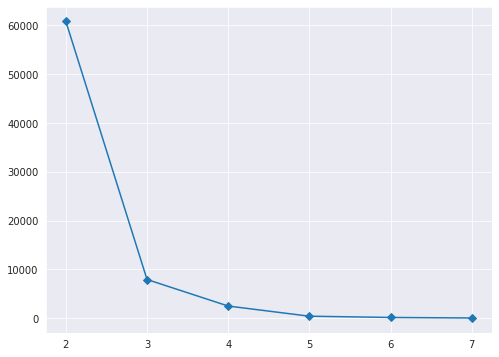

In [57]:
ax = start_plot(style = "darkgrid", figsize = (8, 6))
ax.plot(range(2, 8), elbow, marker = "D")

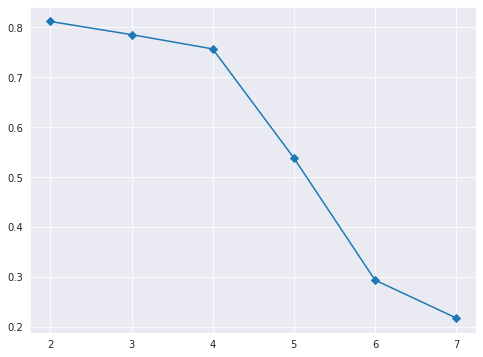

In [58]:
ax = start_plot(style = "darkgrid", figsize = (8, 6))
ax.plot(range(2, 8), savg, marker = "D")

In [59]:
model = KMeans(n_clusters = 4)
labels = model.fit_predict(customer_df)

In [ ]:
customer_df.insert(0, "cluster", labels)

In [ ]:
customer_df

product,cluster,003dc937-e898-4259-870a-4a9afe2eacd6,004e97ea-3847-4b71-9b6d-380fbc2067bd,00818a2f-857a-402e-97e5-fed82eb24f50,00c7a05e-aa41-47de-9bda-ee24f3cb224f,04971b9d-7d9d-47eb-8997-90bdb4404599,0537cb0c-987d-4e69-a54e-41bc691cecb3,05e92617-d0cc-4a30-ad80-e7c10e12bac8,0686f360-4ec0-4ab7-9621-d830f44b3deb,074cdc70-ca10-48c0-859a-cbd0fe7ab0b1,...,fad228f9-f624-441a-ad4e-77fc430cc980,faed65c3-189e-408e-a3cf-5cc4105d75f4,fb212764-b038-4656-98f4-b68a0b8b4a07,fb502e59-d6d9-48f4-8f87-0eef96cef5e6,fcdebb1b-4e4a-451d-bc3e-ee957560f1b6,fe0729cd-93b7-4228-bb0b-2b0360aa95cb,fe3f7e8a-5c95-4d88-bdb6-69b79a34abb8,ff0423d0-2e6d-41ec-98ab-60beb68106ef,ff34d739-b1e8-4d8f-ad26-26d478659d3a,age_group
customer,,,,,,,,,,,,,,,,,,,,,
00113cb1-293b-4c73-8844-4ca901c819ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
003c1701-7951-41f7-8e3e-7c102daa28a0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
0053e832-3011-4464-9157-955cd5b1fb76,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
00a0c55f-1f16-4475-a7a3-82c5dd6c0ff4,2,0,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,4
00eedbf8-1784-4e80-8ce3-a11ef8198c87,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
01220559-7825-428b-b0dd-abe76688c3bb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
01e377d9-2b83-4c9f-96ba-ed468c510eb3,1,1,2,0,0,2,2,0,1,0,...,0,0,1,1,1,3,0,1,1,5
020457be-42c6-4074-b15c-ddae166d297a,3,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4


#關聯分析

In [ ]:
#輸入DF，得到每一條order裏面買了什麼商品。
def get_order_list(dataframe):
    order_data = []
    total_order = dataframe["id"].unique()
    for order in total_order:
        item_in_basket = \
            dataframe.loc[dataframe["id"] == order]["product"].tolist()
        order_data.append(item_in_basket)
    print("Order List Compiled Successful")
    return order_data
#
# apyori output is unreadable, I tried to compile
# a dataframe which is more meaningful and readable
#
def apyori_output(apyori_results):
    cols = ['antecedents', 'consequents', 'support',
    'confidence', 'lift', 'itemsets' ]
    df = pd.DataFrame(columns = cols)

    for rule in apyori_results:
        new_row = {
                'antecedents': rule[2][0].items_base,
                'consequents': rule[2][0].items_add,
                'support': rule[1],
                'confidence':rule[2][0].confidence,
                'lift': rule[2][0].lift,
                'itemsets': rule[0]}
        df = df.append(new_row, ignore_index=True)
    return df

In [ ]:
order_list = get_order_list(df)

Order List Compiled Successful


In [ ]:
order_list[0]

['e4a7f3a7-0cf7-44bb-8c86-b15b89f93406',
 '0c995c04-0217-4887-963b-7a184eae110e',
 'f8a75c52-b6ab-41ae-ae70-c81a7b6ef83d',
 '813727be-d8a7-4cff-be18-eb9925bef9ef',
 '3f35f872-0ae2-4c63-b87b-30209fd4db0b',
 '6c47bdfc-db3a-4c59-99c1-4e33c8460436',
 'bf86ed4f-5ca9-42a6-b0c2-2630c6d7b781',
 '75c84de2-352b-4cd4-a14f-ced82b0ac7d9',
 'f82164d5-704f-4c03-a2ae-2100b8807d58',
 '75a2ab02-1d07-450d-9e76-91b53d361ba7']

In [ ]:
# !pip3 install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=6c479c492ff2597381ce03e3ca144afc6828c1fb3181b60e68a181ca0004f766
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_ary = te.fit_transform(order_list)
orders_to_be_mined = pd.DataFrame(te_ary, columns=te.columns_)
print('MLXTEND: Transcation Encoder Completed')
print_now()
print('')

frequent_itemsets = apriori(orders_to_be_mined, 
        min_support=0.005, 
        use_colnames=True)
print('MLXTEND: frequent itemsets generated')
print_now()

MLXTEND: Transcation Encoder Completed
2022-07-07 00:34:41.370346



KeyboardInterrupt: ignored